In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
plt.rcParams.update({'font.size':22})
import os.path, time
import math

ind:  0 --------
-R2_E500_Psi0.0_LRC0.001_LRTheta0.0001_LRV0.0_temp0.001_lambda1.0_seed1
mean:  11.754206152131934  var:  448.8559040970192
ind:  1 --------
-R2_E500_Psi0.0_LRC0.001_LRTheta1e-05_LRV0.0_temp0.001_lambda1.0_seed1
mean:  7.004313565411037  var:  723.7671245163203


[]

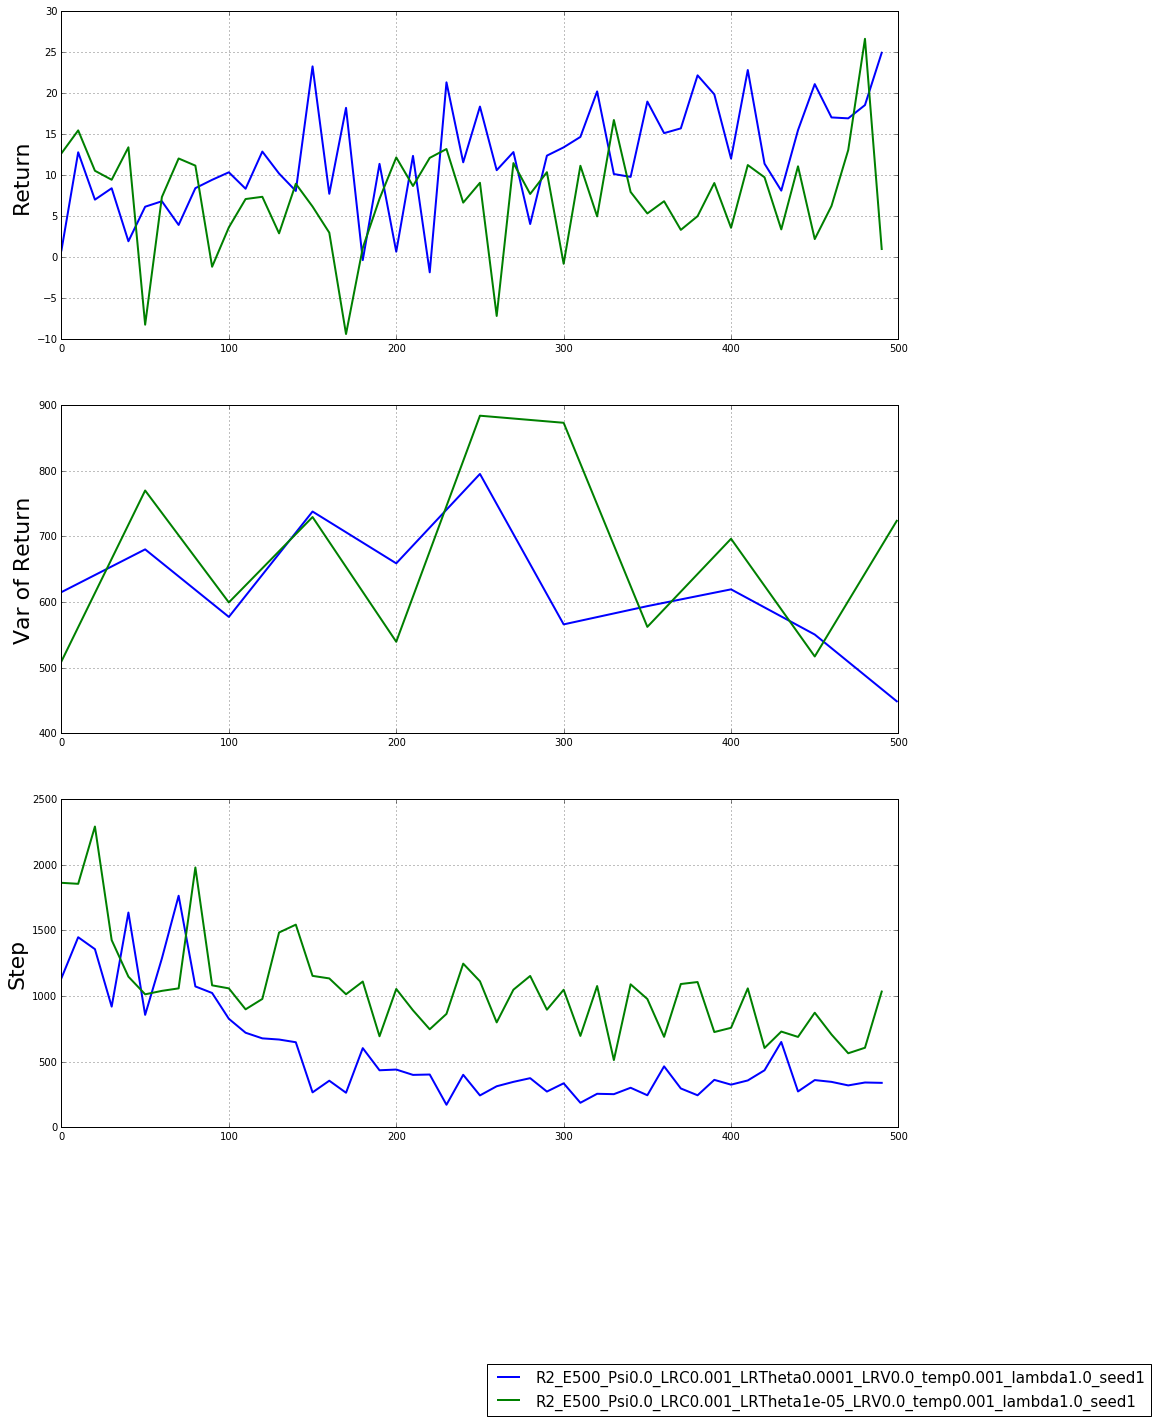

In [3]:
# SAC Without Traces: Simple Mean and Var calculation Both

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 20))

major_dir = "../../Neurips2020Results/Results_Puddle" # Add directory name where results are stored
path = os.path.join(major_dir, "PuddleCont") # Change the directory structure of reading according to your saving structure
save_folder_plot = os.path.join(major_dir,"PuddleContPlots")
if not os.path.exists(save_folder_plot):
        os.makedirs(save_folder_plot)

psi_list = ["0.0","0.01"]
dirs = os.listdir(path)
file_names_to_read = []
for dir_name in dirs:
    if (dir_name.startswith("R2_")and "seed1" in dir_name):# and "temp0.1" in dir_name):
#         psi = dir_name.split("_")[2].split("Psi")[1]
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read.append(dir_name)
  


legend_x = 0.5
legend_y = -2

for ind,f in enumerate(file_names_to_read):
    print("ind: ", ind, "--------")
    var_mean = np.load(os.path.join(path, f, 'RewardDistributionVarMean.npy'))
    var_std = np.load(os.path.join(path, f, 'RewardDistributionVarStd.npy'))
    mean_mean = np.load(os.path.join(path, f, 'RewardDistributionMeanMean.npy'))
    mean_std = np.load(os.path.join(path, f, 'RewardDistributionMeanStd.npy'))
    step = np.load(os.path.join(path, f, 'RewardDistributionStep.npy'))
    neps = mean_mean.shape[0]
    x_axis = list(np.arange(0,neps,50))
    x_axis.append(neps-1)
    x_axis = np.array(x_axis)
    new_mean = []
    new_step = []
    window = 10
    for eps in np.arange(0,neps,window):
        new_mean.append(np.mean(mean_mean[eps: eps+window]))
        new_step.append(np.mean(step[eps: eps+window]))
        
#     if new_mean[-1]<39:
#         continue
#     if "lambda0.8" in f:
#         linestyle = "--"
#     else:
    linestyle = "-"
    print(linestyle + f)
    
    print("mean: ", np.mean(mean_mean[:-20]), " var: ", var_mean[-1])
    ax0.plot(np.arange(0,neps,window), new_mean, label = f,linewidth = 2, linestyle = linestyle)
    ax1.plot(x_axis, var_mean, label = f,linewidth = 2, linestyle = linestyle)
    ax2.plot(np.arange(0,neps,window), new_step, linewidth = 2, linestyle = linestyle)
    
#     ax0.errorbar(x_axis, mean_mean, mean_std, label = f, barsabove=True, linewidth = 2,capthick = 6)
#     ax1.errorbar(x_axis, var_mean, var_std, label = f, barsabove=True, linewidth = 2,capthick = 6)


ax1.legend(prop={'size': 15}, loc='center left', bbox_to_anchor=(legend_x, legend_y))
ax0.set_ylabel("Return",fontsize=22)
ax1.set_ylabel("Var of Return",fontsize=22)
ax2.set_ylabel("Step",fontsize=22)
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)


plt.plot()

In [7]:
#Off Policy Discrete Puddle World
major_dir = "Results" # Add directory name where results are stored
datep="08-01" # Mention the date for which you want to plot
path = os.path.join(major_dir, "PuddleSACOffP_"+datep) # Change the directory structure of reading according to your saving structure
save_folder = os.path.join(major_dir,"Plots_"+datep)
if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
dirs = os.listdir(path)
file_names_to_read_i = []
for dir_name in dirs:
    if (dir_name.startswith("R") and "E" in dir_name):
        if ("_thread" in dir_name):
            continue
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read_i.append(dir_name)
                    
final_rewards =[]
psis=["0.0","0.005"] #Add Psi values to plot the curve for
episode =5000
file_names_to_read= []
name_to_index= {}
cur_index_dict = 0
final_nanes =[]
for i in range(len(psis)):    
    for fi in file_names_to_read_i:  
        if "Psi"+str(psis[i])+"_" in fi:
            name_elements = fi.split("_seed")
            start_name = name_elements[0].split("_Psi")[1]
            start_name = "Psi"+start_name
            if start_name not in file_names_to_read:
                name_to_index[start_name] = cur_index_dict                
                file_names_to_read.append(start_name)
                cur_index_dict+=1
                
for i in range(len(file_names_to_read)):
    flag = 0
    curr_return = []
    for fi in file_names_to_read_i:    
        name_elements = fi.split("_seed")
        start_name = name_elements[0].split("_Psi")[1]
        start_name = "Psi"+start_name
        if start_name in file_names_to_read[i]:
            filename_reward = os.path.join(path,fi, "History.npy")
            data = np.load(filename_reward)
            curr_return.extend(data[:,:episode,0])
            
    return_tar = np.array(curr_return)    
    averaged_reward = np.mean(return_tar, axis = 0)
    variance_reward = np.std(return_tar, axis = 0)
    print ("filename: ", file_names_to_read[i], "at i: ",i, "Reward shape: ", return_tar.shape)
    
    data_reward = np.vstack((averaged_reward, variance_reward))
    final_rewards.append(data_reward)    

filename:  Psi0.0_LRC0.005_LRTheta0.0005_LRV0.005_temp0.75_ksteps50_states1024_ntile10 at i:  0 Reward shape:  (50, 3500)
filename:  Psi0.005_LRC0.01_LRTheta0.001_LRV0.005_temp0.75_ksteps50_states1024_ntile10 at i:  1 Reward shape:  (50, 3500)


Psi0.0_LRC0.005_LRTheta0.0005_LRV0.005_temp0.75_ksteps50_states1024_ntile10
Mean score:  25.5945896365
Mean var:  28.4414465443
0
Psi0.005_LRC0.01_LRTheta0.001_LRV0.005_temp0.75_ksteps50_states1024_ntile10
Mean score:  24.5908182807
Mean var:  18.126075082
1


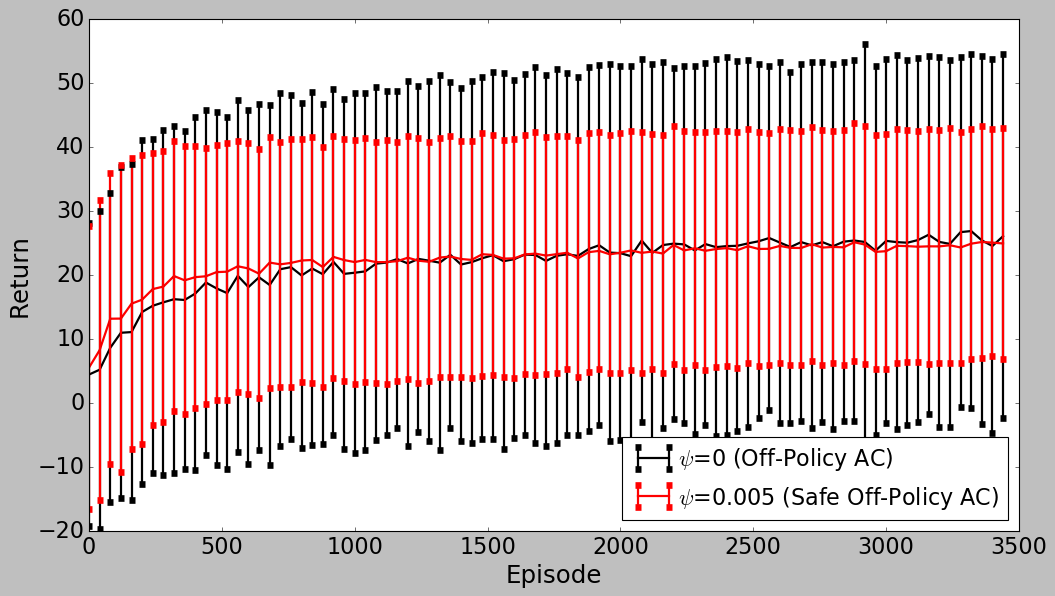

In [8]:
"""
Return Plot
"""
start = 0.0
stop = 1.0
number_of_lines= len(file_names_to_read)
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [ cm.Dark2(x) for x in cm_subsection ]
colors=['k','r', 'g', 'c', 'm','y','orange']

labels_write=["0 (Off-Policy AC)","0.005 (Safe Off-Policy AC)"]#,"0.1 (Safe On-Policy AC)"]
color_count = 0

start_from= 0
end_to = 3500
k_steps = 1 #Adjust ksteps accordingly here
window = 40
fig, ax = plt.subplots(figsize=(15, 8))
color_count = 0
for k in range(len(file_names_to_read)):
    reward = final_rewards[k][0][start_from:end_to]
    reward_std = final_rewards[k][1][start_from:end_to]
    mean_score = np.mean(reward[-500:])
    mean_var = np.mean(reward_std[-500:])
    length = int(reward.shape[0]/ window)
    new_reward = np.zeros(length)
    new_reward_std = np.zeros(length)
    x_axis = []
    for i in range(0,length):
        new_reward[i] = np.mean(reward[i*window : i*window + window])
        new_reward_std[i] = np.mean(reward_std[i*window : i*window + window])
        x_axis.append(start_from+i*k_steps*window)

    mean_std_dev = np.mean(new_reward_std)
    error =new_reward_std
    name = file_names_to_read[k]
    linestyle="-"
    print(file_names_to_read[k])
    print("Mean score: ", mean_score)
    print("Mean var: ", mean_var)
    print(k)

    plt.errorbar(x_axis, new_reward, new_reward_std, label = "$\psi$="+labels_write[color_count],barsabove=True, linewidth = 2,capthick = 6, color = colors[color_count] )
    color_count +=1

plt.xlabel("Episode", fontsize=22)
plt.ylabel("Return",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20}, loc='best', handletextpad=0.1)

# plt.savefig((os.path.join(save_folder,"Puddle_Cont_OffPol_Zoomed"+".png")), dpi=400, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype=None, format=None,
#            transparent=True, bbox_inches='tight', pad_inches=0,
#            frameon=None)
plt.show()
plt.close()

In [9]:
#To Plot the Trajectories
from puddlesimple import PuddleSimpleEnv
import gym
import os
from tiles3 import *
import matplotlib.pyplot as plt

In [10]:
class TileFeature:
    def __init__(self, ntiles, nbins, discrete_states, features_range):
        self.ntiles = ntiles
        self.nbins = nbins
        self.max_discrete_states = discrete_states
        self.iht = IHT(discrete_states)
        self.features_range = features_range
        self.scaling = nbins /features_range

    def __call__(self, input_observation):
        return tiles(self.iht, self.ntiles, input_observation*self.scaling)

    def __len__(self):
        return self.max_discrete_states


In [11]:
r_folder = os.path.join(major_dir,"PuddleSACOffP_08-01")#Path where data from experiment is stored
names =["R50_E3500_Psi0.0_LRC0.005_LRTheta0.0005_LRV0.005_temp0.75_ksteps50_states1024_ntile10_seed10_Policy_S",
        "R50_E3500_Psi0.005_LRC0.01_LRTheta0.001_LRV0.005_temp0.75_ksteps50_states1024_ntile10_seed10_Policy_S"]
index=0
k_steps=50
maxDiscreteStates = 1024
env = gym.make('PuddleEnv-v0')
features_range = env.observation_space.high - env.observation_space.low
features = TileFeature(10, 5, maxDiscreteStates, features_range) # 5X5 tiles over joint space
nfeatures = int(maxDiscreteStates)
nactions = env.action_space.n

weight_policy_total = np.load(os.path.join(r_folder, names[index],"Weights_Policy.npy"))
    
    
    

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [12]:
num_traj=2
episode = -50
run=4

for k in range(1):
    weights = weight_policy_total[run,episode]
    for i in range(num_traj):
        x=[]
        y=[]
        done= False
        observation = env.reset()
        step=0
        while done!=True:
            old_observation = observation
            phi = features(observation)
            action = np.argmax(np.sum(weights[phi, :], axis=0))
            observation, reward, done, _ = env.step(action)
            x.append(observation[0])
            y.append(observation[1])
            step+=1
            if step>100:
                break
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(x,y, linewidth =2)
        ax.axvspan(0.3, 0.7, ymin=0.3, ymax=0.7, alpha=0.3, color='blue')
        plt.xlim((0,1.02))
        plt.ylim((0,1.02))
        plt.show()
        plt.close()
        